In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
from matplotlib import cm

# Import custom functions
from util import *
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

# Define colors
colormap = cm.tab20.colors
viridis = cm.get_cmap('viridis', 12)
process_colors = [viridis(0.95), viridis(0.6), viridis(
    0.45), 'red', 'orange', 'grey', viridis(0.2)]

# Load the data
with open('../../data/monte_carlo_individual.pkl', 'rb') as f:
    monte_carlo_individual = pickle.load(f)

with open('../../data/monte_carlo_all_params.pkl', 'rb') as f:
    monte_carlo_dict = pickle.load(f)

# X = excavation
# T = transportation
# B = beneficiation
# R = reactor
# E = electrolysis
# L = liquefaction
# S = storage

storage_label = 0
liquefaction_label = 1
electrolysis_label = 2
transportation_label = 3
excavation_label = 4
beneficiation_label = 5
hydrogen_reduction_label = 6

ilmenite_wt = np.linspace(1, 16, 31)

# Storage, Liquefaction, Electrolysis, Transportation, Excavation, Beneficiation, Reactor
process_indexes = [storage_label, liquefaction_label, electrolysis_label,
                   transportation_label, excavation_label, beneficiation_label, hydrogen_reduction_label]
process_labels = ['Storage', 'Liquefaction', 'Electrolysis',
                  'Transportation', 'Excavation', 'Beneficiation', 'Hydrogen reduction']

process_parameters = {
    'Excavation': ['cohCoeff', 'intAngle', 'extAngle'],
    'Transportation': ['motor_efficiency', 'mRover'],
    'Beneficiation': ['enrichment_factor', 'benef_ilmenite_recovery'],
    'Hydrogen reduction': ['batch_reaction_time_in_hours', 'CFI_thickness', 'HTMLI_thickness', 'delta_T_insulation', 'reactor_heat_up_time_in_hours', 'T_regolith_in', 'T_pre_heater', 'enrichment_factor', 'benef_ilmenite_recovery'],
    'Electrolysis': ['system_efficiency'],
    'Liquefaction': ['cryocooler_efficiency', 'T_hot_reservoir_carnot_cycle', 'T_of_incoming_oxygen'],
    'Storage': ['vip_thickness', 'vip_thermal_conductivity', 'vip_emissivity', 'cryocooler_efficiency_storage']
}

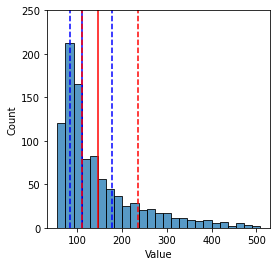

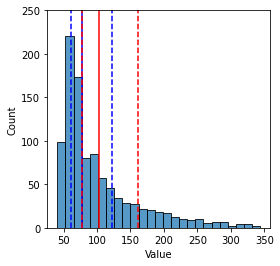

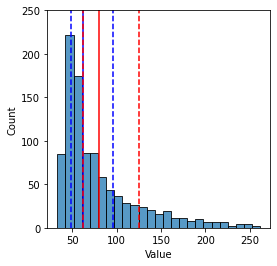

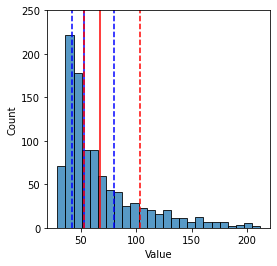

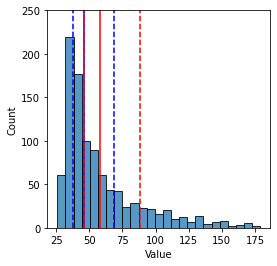

In [2]:
for i in range(0,5):
    plt.figure(figsize=(4, 4))
    sns.histplot(monte_carlo_dict[1][:,i])
    max_val = 250#monte_carlo_dict[1][:,i].max()
    plt.gca().vlines(np.mean(monte_carlo_dict[1][:,i]), 0, max_val,ls='-', color='red')

    plt.gca().vlines(np.quantile(monte_carlo_dict[1][:,i],0.5), 0, max_val,ls='-', color='blue')
    plt.gca().vlines(np.quantile(monte_carlo_dict[1][:,i],0.25), 0, max_val,ls='--', color='blue')
    plt.gca().vlines(np.quantile(monte_carlo_dict[1][:,i], 0.75), 0, max_val,ls='--', color='blue')
    plt.gca().vlines(np.mean(monte_carlo_dict[1][:,i])+np.std(monte_carlo_dict[1][:,i]), 0, max_val,ls='--', color='red')
    plt.gca().vlines(np.median(monte_carlo_dict[1][:,i]), 0, max_val,ls='--', color='red')
    plt.gca().set_ylim([0, 250])
    plt.gca().set_xlabel('Value')
    plt.show()

In [3]:
np.quantile(monte_carlo_dict[1][:,i], 0.25)
np.quantile(monte_carlo_dict[1][:,i], 0.75)

68.75109931953224

# Overall uncertainty

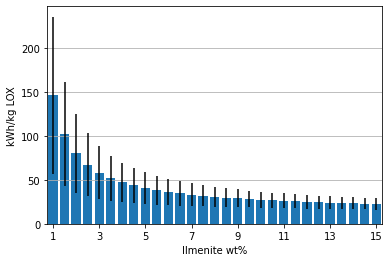

In [4]:
total_mu = np.mean(monte_carlo_dict[1], axis=0)
total_std = np.std(monte_carlo_dict[1], axis=0)

plt.bar(x=ilmenite_wt, height=total_mu, yerr=total_std, color='C0', width=0.4)
plt.gca().set_xlabel('Ilmenite wt%')
plt.gca().set_ylabel('kWh/kg LOX')
plt.gca().grid(axis='y')
plt.gca().set_xticks([1, 3, 5, 7, 9, 11, 13, 15])
plt.gca().set_xlim((0.75, 15.25))
plt.savefig('results_w_systematics.png', dpi=300, bbox_inches='tight')
plt.show()

/home/freya/anaconda3/envs/pyhat/lib/python3.8/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


(-0.55, 28.55)

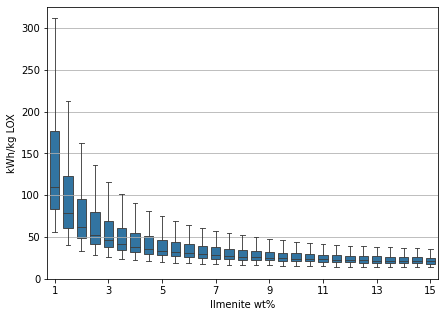

In [5]:

total_df = pd.DataFrame(monte_carlo_dict[1], columns=np.linspace(1, 16, 31))
plt.figure(figsize=(7, 5))
plt.gca().grid(axis='y')
sns.boxplot(data=total_df,color='C0',width=0.7, fliersize=0.5, linewidth=0.9, showfliers=False)
plt.gca().set_xlabel('Ilmenite wt%')
plt.gca().set_ylabel('kWh/kg LOX')

plt.xticks([0, 4, 8, 12, 16, 20, 24, 28],[1, 3, 5, 7, 9, 11, 13, 15])
plt.gca().set_xlim((-0.55, 28.55))
plt.gca().set_ylim((0., 325))
plt.gca().set_xlim((-0.55, 28.55))

#minor_locator = MultipleLocator(1.)
#plt.gca().xaxis.set_minor_locator(minor_locator)

# Per process

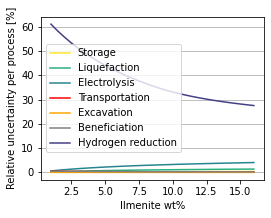

In [6]:
plt.figure(figsize=(4, 3))
for l in range(0, 7):
    mu = np.mean(monte_carlo_dict[1][:], axis=0)
    std = np.std(monte_carlo_dict[0][:, l, :], axis=0)

    plt.errorbar(x=ilmenite_wt, y=std/mu*100,
                 label=process_labels[l], color=process_colors[l])
plt.legend()
plt.gca().set_xlabel('Ilmenite wt%')
plt.gca().set_ylabel('Relative uncertainty per process [%]')
plt.gca().grid(axis='y')
plt.savefig('systematics_per_process.png', dpi=300, bbox_inches='tight')
plt.show()

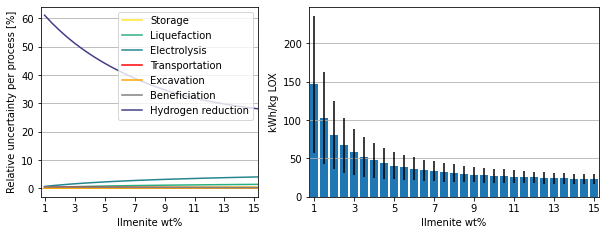

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(
    10, 3.5), gridspec_kw={'width_ratios': [1.5, 2]})
total_mu = np.mean(monte_carlo_dict[1], axis=0)
total_std = np.std(monte_carlo_dict[1], axis=0)
stds_at_10_per_process = []
relative_stds_at_10_per_process = []
mu_at_10_per_process = []

for l in range(0, 7):
    std = np.std(monte_carlo_dict[0][:, l, :], axis=0)
    mu = np.mean(monte_carlo_dict[0][:, l, :], axis=0)
    stds_at_10_per_process.append(std[18])
    relative_stds_at_10_per_process.append(std[18]/mu[18]*100)
    mu_at_10_per_process.append(mu[18])
    ax[0].errorbar(x=ilmenite_wt, y=std/total_mu*100,
                   label=process_labels[l], color=process_colors[l])
ax[0].legend(loc='upper right')
ax[0].set_xlabel('Ilmenite wt%')
ax[0].set_ylabel('Relative uncertainty per process [%]')
#plt.savefig('systematics_per_process.png', dpi=300, bbox_inches='tight')
ax[0].set_xticks([1, 3, 5, 7, 9, 11, 13, 15])
ax[0].set_xlim((0.75, 15.25))
ax[0].grid(axis='y')

ax[1].bar(x=ilmenite_wt, height=total_mu, yerr=total_std,
          label=process_labels[l], color='C0', width=0.4)
# ax[1].legend()
ax[1].set_xlabel('Ilmenite wt%')
ax[1].set_ylabel('kWh/kg LOX')
ax[1].grid(axis='y')
ax[1].set_xticks([1, 3, 5, 7, 9, 11, 13, 15])
ax[1].set_xlim((0.75, 15.25))
plt.savefig('results_w_systematics_per_process.png',
            dpi=300, bbox_inches='tight')
plt.show()


# Per parameter

In [8]:
for key in monte_carlo_individual.keys():
    std_av = np.mean(np.std(monte_carlo_individual[key][1], axis=0), axis=0)
    mu_av = np.mean(np.mean(monte_carlo_individual[key][1], axis=0), axis=0)
    std_std = np.std(np.std(monte_carlo_individual[key][1], axis=0)/mu_av*100, axis=0)
    
    extra = ''
    if std_std > 1.0:
        extra = ' --> not constant'
    print(key, f'{np.around(std_av/mu_av*100,2)}{extra}')

cryocooler_efficiency 0.52
T_hot_reservoir_carnot_cycle 1.24
T_of_incoming_oxygen 0.08
enrichment_factor 42.06 --> not constant
benef_ilmenite_recovery 0.31
motor_efficiency 0.17
mRover 0.08
cohCoeff 0.0
intAngle 0.0
extAngle 0.0
vip_thickness 0.3
vip_thermal_conductivity 0.25
vip_emissivity 0.11
cryocooler_efficiency_storage 0.14
batch_reaction_time_in_hours 4.47
CFI_thickness 2.98 --> not constant
HTMLI_thickness 0.29
delta_T_insulation 2.24 --> not constant
reactor_heat_up_time_in_hours 0.28
T_regolith_in 2.14 --> not constant
T_pre_heater 1.32
system_efficiency 2.59


----- Storage
VIP thickness (m) 16.45
VIP thermal conductivity 14.19
VIP emissivity 6.32
Cryocooler efficiency 14.79
----- Liquefaction
Cryocooler efficiency 14.86
$T$ (Hot reservoir) 18.64
$T$ (Incoming oxygen) 1.18
----- Electrolysis
System efficiency 9.79
----- Transportation
Motor efficiency 20.61
Rover mass (kg) 9.59
----- Excavation
Cohesion coefficient 13.65
Internal angle of friction 1.01
External angle of friction 7.09
----- Beneficiation
Enrichment factor 0.0
Ilmenite recovery (%) 34.15
----- Hydrogen reduction
Batch reaction time (hours) 9.33
CFI thickness (m) 4.24
HTMLI thickness (m) 0.42
$\Delta T$ (Insulation) 3.18
Reactor heat up time (hours) 0.4
$T$ (Regolith in) 2.94
$T$ (Pre-heater) 2.93
Enrichment factor 57.05
Ilmenite recovery (%) 0.0


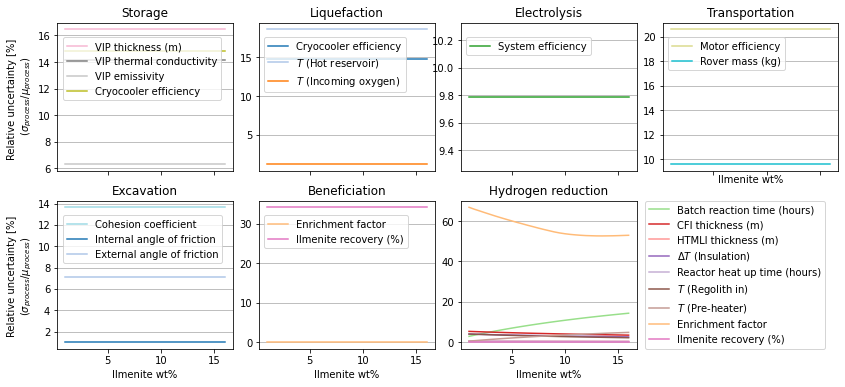

In [9]:
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(
    14, 6), sharex=True, gridspec_kw={'hspace': 0.2, 'wspace': 0.15})
fig.delaxes(axs[1, 3])
df = pd.DataFrame(
    {'Process': [], 'Relative uncertainty [%]': [], 'Parameter': []})

for i, ax in enumerate(axs.ravel()):
    if i == 7:
        break
    process_label = process_labels[i]
    process_index = process_indexes[i]
    print(f'----- {process_label}')
    for key in process_parameters[process_label]:
        label = find_new_label_name(key)
        color = find_label_color(key)
        mu = np.mean(monte_carlo_individual[key][0][:, process_index], axis=0)
        std = np.std(monte_carlo_individual[key][0][:, process_index], axis=0)

        print(label, np.around(np.mean(std/mu*100), 2))
        new_row = pd.DataFrame({'Process': [process_label],
                                'Relative uncertainty [%]': [np.around(std / mu * 100, 4)],
                                'Parameter': [label]})
        df = pd.concat([df, new_row], ignore_index=True)

        ax.errorbar(ilmenite_wt, y=std/mu*100, label=label, color=color)

    if process_label == 'Hydrogen reduction':
        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    else:
        ax.legend(loc='upper left', bbox_to_anchor=(.03, 0.9), borderaxespad=0.)
    ax.set_title(process_label)
    ax.grid(axis='y')

axs[0, 0].set_ylabel(
    'Relative uncertainty [%] \n ($\sigma_{process}/\mu_{process}$) ')
axs[1, 0].set_ylabel(
    'Relative uncertainty [%] \n($\sigma_{process}/\mu_{process}$) ')
for _ in range(0, 3):
    axs[1, _].set_xlabel('Ilmenite wt%')
axs[0, 3].set_xlabel('Ilmenite wt%')
plt.savefig('systematics_per_process_per_param.png',
            dpi=300, bbox_inches='tight')


batch_reaction_time_in_hours 3.39
CFI_thickness 0.55
HTMLI_thickness 0.05
delta_T_insulation 0.41
reactor_heat_up_time_in_hours 0.05
T_regolith_in 0.54
T_pre_heater 1.28
enrichment_factor 4.59
benef_ilmenite_recovery 0.0


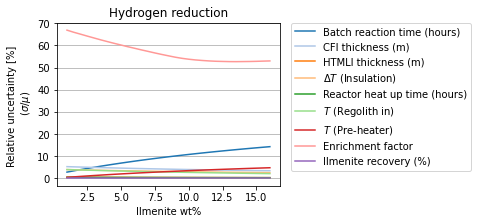

In [10]:
fig = plt.figure(figsize=(4, 3))
ax = plt.gca()
i = 6

process_label = process_labels[i]
process_index = process_indexes[i]

for i, key in enumerate(process_parameters[process_label]):
    label = find_new_label_name(key)
    color = colormap[i]  # find_label_color(key)
    mu = np.mean(monte_carlo_individual[key][0][:, process_index], axis=0)
    std = np.std(monte_carlo_individual[key][0][:, process_index], axis=0)
    ax.errorbar(ilmenite_wt, y=std/mu*100, label=label, color=color)
    if np.std(std/mu) > 0.:
        print(key, np.around(np.std(std/mu*100), 2))

if process_label == 'Hydrogen reduction':
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
else:
    ax.legend(loc='upper left', bbox_to_anchor=(.03, 0.9), borderaxespad=0.)
    ax.set_title(process_label)

ax.set_ylabel('Relative uncertainty [%] \n ($\sigma/\mu$) ')
ax.set_title('Hydrogen reduction')
ax.grid(axis='y')

ax.set_xlabel('Ilmenite wt%')
plt.savefig('systematics_hydrogen_reduction.png', dpi=300, bbox_inches='tight')

# At 10 % ilmenite

In [11]:
print('Value at 10% ilmenite in kWh/kg LOX')
print('-'*36)
for i, l in enumerate(process_labels):
    print(l, np.around(mu_at_10_per_process, 3)[i])

print(' '*36)
print('Uncertainty at 10% ilmenite in kWh/kg LOX')
print('-'*41)
for i, l in enumerate(process_labels):
    print(l, np.around(stds_at_10_per_process, 3)[i])

print(' '*36)
print('Relative uncertainty at 10% ilmenite')
print('-'*36)
for i, l in enumerate(process_labels):
    print(l, np.around(relative_stds_at_10_per_process, 3)[i])

Value at 10% ilmenite in kWh/kg LOX
------------------------------------
Storage 0.317
Liquefaction 1.193
Electrolysis 9.367
Transportation 0.161
Excavation 0.003
Beneficiation 0.161
Hydrogen reduction 16.427
                                    
Uncertainty at 10% ilmenite in kWh/kg LOX
-----------------------------------------
Storage 0.083
Liquefaction 0.303
Electrolysis 0.897
Transportation 0.067
Excavation 0.001
Beneficiation 0.067
Hydrogen reduction 9.102
                                    
Relative uncertainty at 10% ilmenite
------------------------------------
Storage 26.078
Liquefaction 25.419
Electrolysis 9.577
Transportation 41.301
Excavation 41.967
Beneficiation 41.301
Hydrogen reduction 55.405


In [12]:
stds_per_param = []
relative_stds_per_param = []

for i, l in enumerate(monte_carlo_individual.keys()):
    stds_per_param.append(
        (l, np.around(np.std(monte_carlo_individual[l][1], axis=0)[18], 3)))
    relative_stds_per_param.append(
        (l, np.around(np.std(monte_carlo_individual[l][1], axis=0)[18]/total_mu[18]*100, 3)))

stds_per_param.sort(key=lambda x: x[1], reverse=True)
relative_stds_per_param.sort(key=lambda x: x[1], reverse=True)

In [13]:
print('='*36)
print('Relative uncertainty at 10% ilmenite')
print('='*36)

print('5 Largest uncertainty per parameter')
print('-'*36)
for i in range(0, 5):
    print(stds_per_param[i])

print(' '*36)
print('5 Largest relative uncertainty per parameter')
print('-'*44)
for i in range(0, 5):
    print(relative_stds_per_param[i])


Relative uncertainty at 10% ilmenite
5 Largest uncertainty per parameter
------------------------------------
('enrichment_factor', 8.729)
('batch_reaction_time_in_hours', 1.416)
('system_efficiency', 0.917)
('CFI_thickness', 0.535)
('T_pre_heater', 0.465)
                                    
5 Largest relative uncertainty per parameter
--------------------------------------------
('enrichment_factor', 31.78)
('batch_reaction_time_in_hours', 5.155)
('system_efficiency', 3.339)
('CFI_thickness', 1.947)
('T_pre_heater', 1.694)
